# Ford GoBike Dataset
## by Caio Vasconcelos Silva Andrade

## Investigation Overview

> The Ford Gobike system, a bike-sharing system covering the greater San Francisco Bay area, now know as Bay Wheels, is the first regional and large-scale bicycle sharing system deployed in California and on the West Coast of the United States with nearly 500,000 rides since the launch in 2017 and had about 10,000 annual subscribers as of January 2018. As of January 2018, the Bay Wheels system had over 2,600 bicycles in 262 stations across San Francisco, East Bay and San Jose, this visualization studies a dataset from 2018 counts with 183412 values with features like gender, stations name and other ones

## Dataset Overview

> The dataset used for the analysis is from January 2018 to December 2018, counting with features like gender, duration in seconds of the trips and others, the data is saved on a CSV.
> Visualizations below are created from some wrangling and cleanning realized on the data to facilitate exploration analysis.

In [2]:
# import all packages and set plots to be embedded inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [3]:
# load in the dataset into a pandas dataframe
fonte = 'slide.csv'
df = pd.read_csv(fonte)
df2 = df.copy()
df2 = df2.query('duration_sec <= 1000')

In [4]:
print(df.shape)
df.info()

(183334, 17)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183334 entries, 0 to 183333
Data columns (total 17 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183334 non-null  int64  
 1   start_time               183334 non-null  object 
 2   end_time                 183334 non-null  object 
 3   start_station_id         183137 non-null  float64
 4   start_station_name       183137 non-null  object 
 5   start_station_latitude   183334 non-null  float64
 6   start_station_longitude  183334 non-null  float64
 7   end_station_id           183137 non-null  float64
 8   end_station_name         183137 non-null  object 
 9   end_station_latitude     183334 non-null  float64
 10  end_station_longitude    183334 non-null  float64
 11  bike_id                  183334 non-null  int64  
 12  user_type                183334 non-null  object 
 13  member_birth_year        175069 non-null  floa

In [5]:
print(df2.shape)
df2.info()

(155770, 17)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 155770 entries, 10 to 183333
Data columns (total 17 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             155770 non-null  int64  
 1   start_time               155770 non-null  object 
 2   end_time                 155770 non-null  object 
 3   start_station_id         155622 non-null  float64
 4   start_station_name       155622 non-null  object 
 5   start_station_latitude   155770 non-null  float64
 6   start_station_longitude  155770 non-null  float64
 7   end_station_id           155622 non-null  float64
 8   end_station_name         155622 non-null  object 
 9   end_station_latitude     155770 non-null  float64
 10  end_station_longitude    155770 non-null  float64
 11  bike_id                  155770 non-null  int64  
 12  user_type                155770 non-null  object 
 13  member_birth_year        149489 non-null  flo

> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

## User type (Subscription), Gender and days of the week

> * Subscribers are by far the majority of the rentals! (Only 12% were casual users).
>
> * Most of the trips were taken by males.
>
> * And we can see the trips taken through the days of the week too! (Sunday and Saturday with the lowest frequency compared to the weekdays)

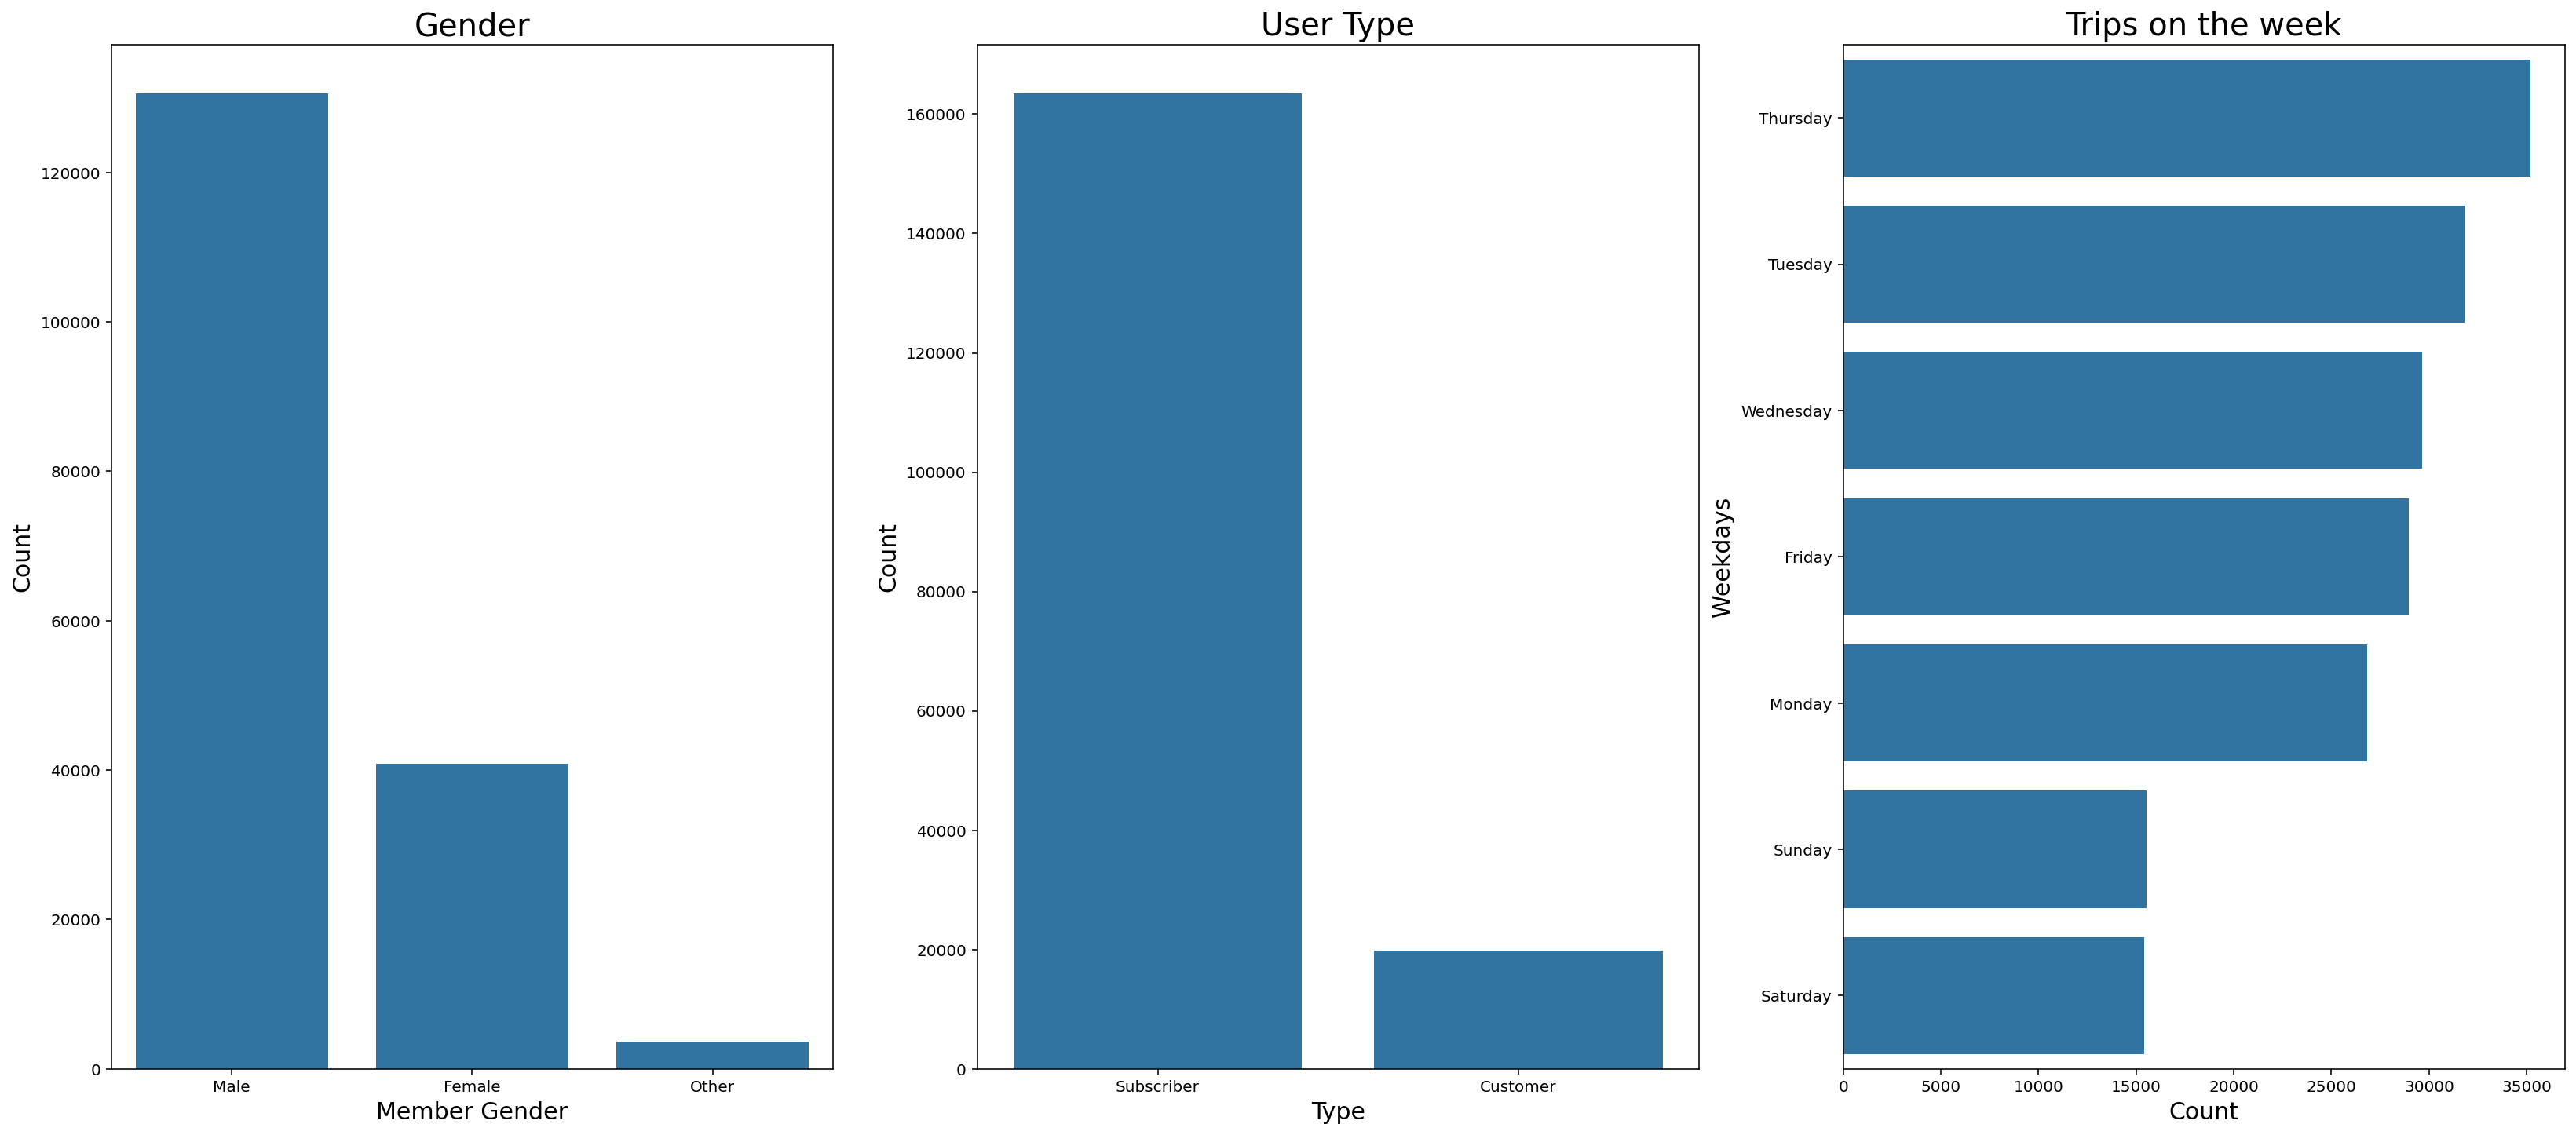

In [20]:
plt.figure(figsize=[28, 12]);
#sns.set_style('darkgrid');

plt.subplot(1, 3, 1);
sns.countplot(data = df, x = 'member_gender', order = df['member_gender'].value_counts().index, color = sns.color_palette()[0]);
plt.xlabel("Member Gender", fontsize = 15);
plt.ylabel("Count", fontsize = 15);
plt.title("Gender", fontsize = 20);

plt.subplot(1, 3, 2);
sns.countplot(data = df, x = 'user_type', order = df['user_type'].value_counts().index, color = sns.color_palette()[0]);
plt.xlabel("Type", fontsize = 15);
plt.ylabel("Count", fontsize = 15);
plt.title("User Type", fontsize = 20);

plt.subplot(1, 3, 3);
sns.countplot(data = df, y = 'start_weekday', order = df['start_weekday'].value_counts().index, color = sns.color_palette()[0]);
plt.xlabel("Count", fontsize = 15);
plt.ylabel("Weekdays", fontsize = 15);
plt.title("Trips on the week", fontsize = 20);

## Gender and Duration

> * In this plot we can see the duration in seconds of the trips by each sex!
>
> * We can see that the Womens are renting the bicicles for a longer period of time!

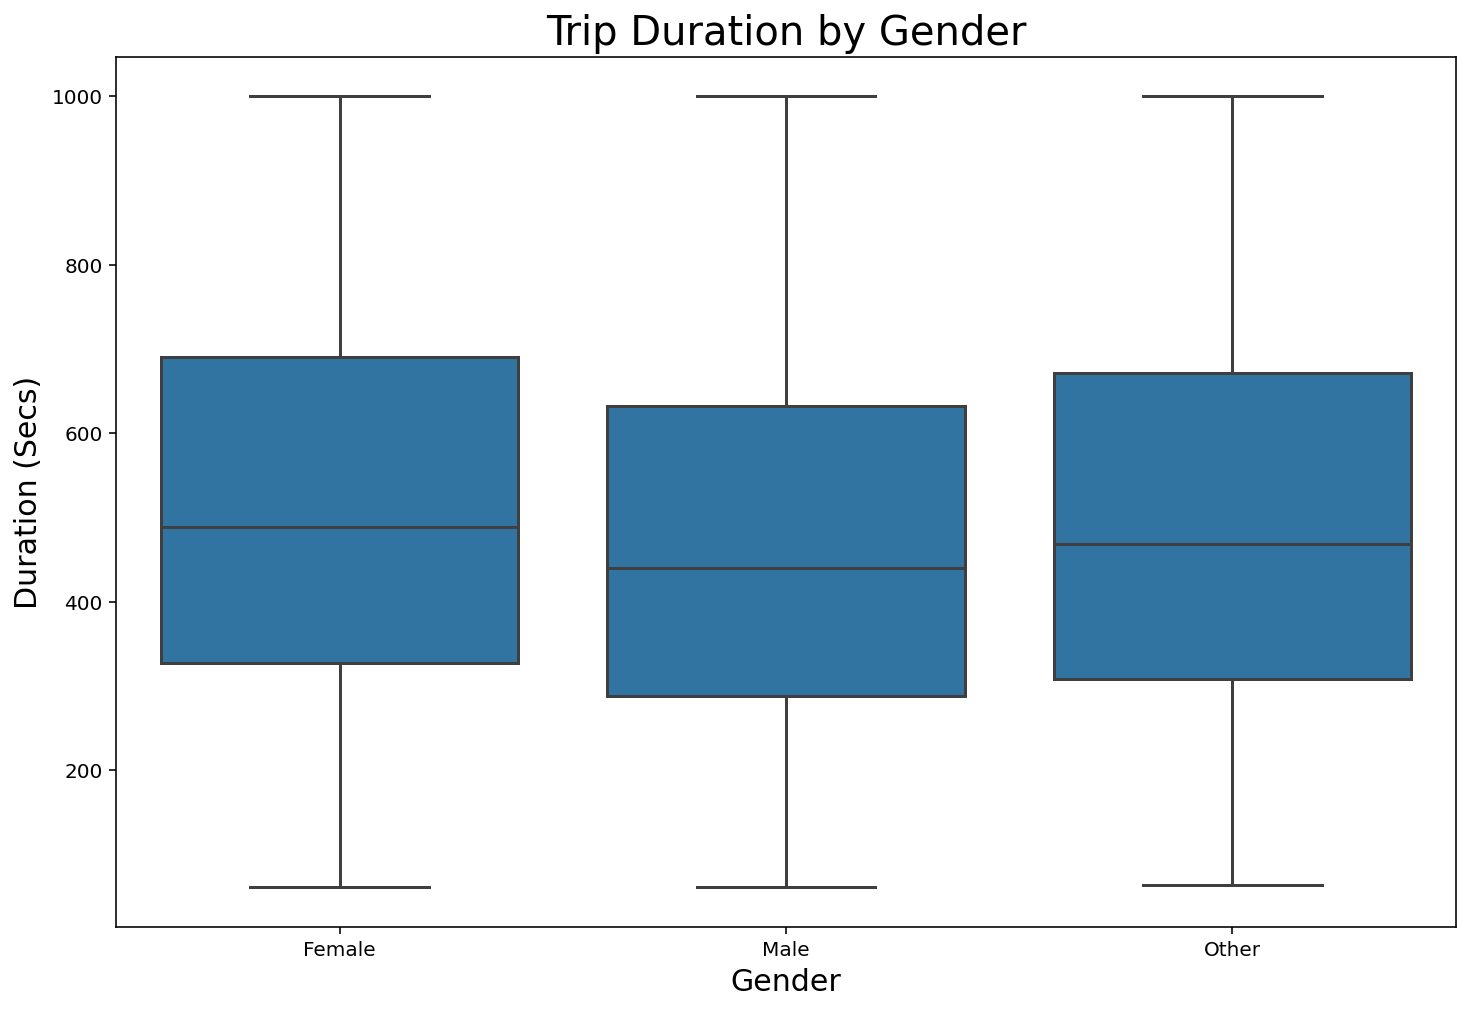

In [21]:
plt.figure(figsize = (12,8))
sns.boxplot(data = df2, x = 'member_gender', y = 'duration_sec', color = sns.color_palette()[0]);
plt.xlabel("Gender", fontsize = 15);
plt.ylabel("Duration (Secs)", fontsize = 15);
plt.title("Trip Duration by Gender", fontsize = 20);

## Weekday, user type and duration
> * In this last plot we can see that the subscribers are renting for a smaller amount of time compared to the normal Customer
>
> * There is an intersting behavior... while on sunday and saturday, the Subscriber rent the bicicle for a smaller time compared to the other days, the Costumer does the opposity! The normal costumer is renting for a longer period than the other days!

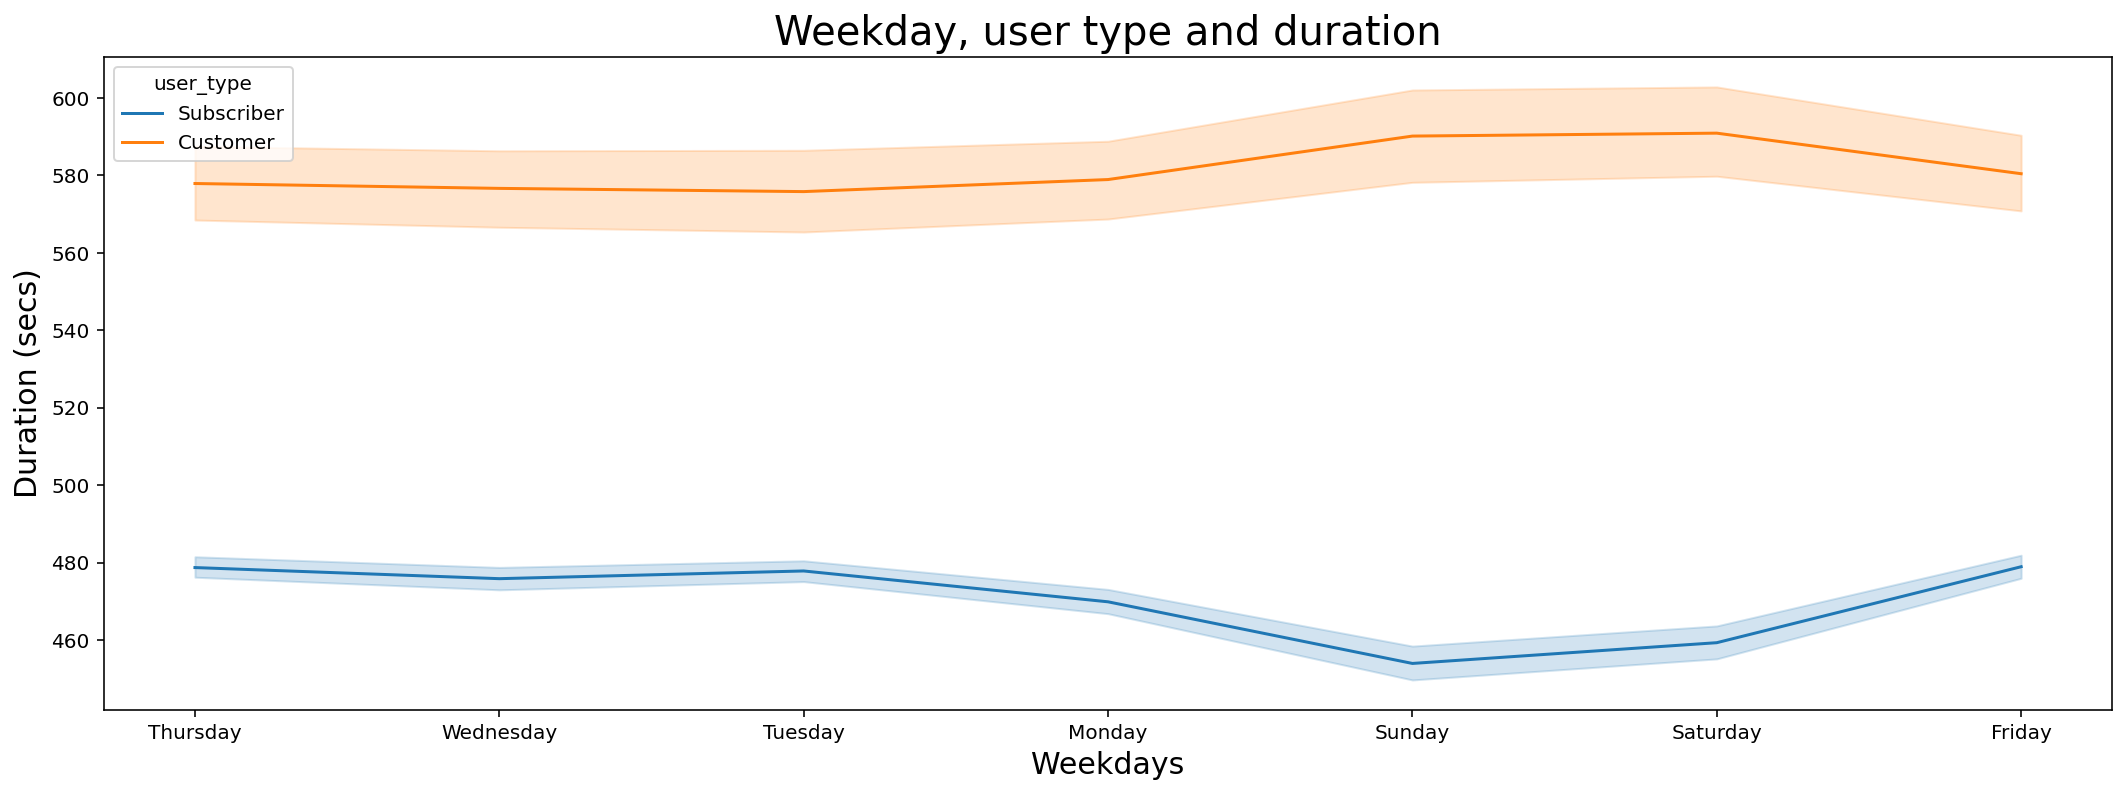

In [22]:
plt.figure(figsize = (18,6))
sns.lineplot(data = df2, x = 'start_weekday', y = 'duration_sec', hue = 'user_type');
plt.xlabel("Weekdays", fontsize = 15);
plt.ylabel("Duration (secs)", fontsize = 15);
plt.title("Weekday, user type and duration", fontsize = 20);